In [4]:
import math
import pandas as pd

# 哈弗辛公式计算两个经纬度点之间的距离
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # 地球平均半径，单位为公里
    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    a = math.sin(dLat/2) * math.sin(dLat/2) + \
        math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * \
        math.sin(dLon/2) * math.sin(dLon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = R * c
    return distance

# 定义国家及其首都的经纬度
capitals = {
    'Austria': {'capital': 'Vienna', 'lat': 48.2082, 'lon': 16.3738},
    'Belgium': {'capital': 'Brussels', 'lat': 50.8503, 'lon': 4.3517},
    'Switzerland': {'capital': 'Bern', 'lat': 46.9479, 'lon': 7.4481},
    'Denmark': {'capital': 'Copenhagen', 'lat': 55.6761, 'lon': 12.5683},
    'Germany': {'capital': 'Berlin', 'lat': 52.5200, 'lon': 13.4050},
    'Spain': {'capital': 'Madrid', 'lat': 40.4168, 'lon': -3.7038},
    'France': {'capital': 'Paris', 'lat': 48.8566, 'lon': 2.3522},
    'United Kingdom': {'capital': 'London', 'lat': 51.5074, 'lon': -0.1278},
    'Italy': {'capital': 'Rome', 'lat': 41.9028, 'lon': 12.4964},
    'Ireland': {'capital': 'Dublin', 'lat': 53.3498, 'lon': -6.2603},
    'Luxembourg': {'capital': 'Luxembourg', 'lat': 49.6117, 'lon': 6.1298},
    'Netherlands': {'capital': 'Amsterdam', 'lat': 52.3702, 'lon': 4.8952},
    'Norway': {'capital': 'Oslo', 'lat': 59.9138, 'lon': 10.7387},
    'Portugal': {'capital': 'Lisbon', 'lat': 38.7223, 'lon': -9.1393},
    'Sweden': {'capital': 'Stockholm', 'lat': 59.3328, 'lon': 18.0645}
}

# 定义相邻国家的列表
adjacent_countries = [
    ('Austria', 'Germany'), ('Austria', 'Switzerland'), ('Austria', 'Italy'), 
    ('Belgium', 'France'), ('Belgium', 'Netherlands'), ('Belgium', 'Luxembourg'), 
    ('Switzerland', 'France'), ('Switzerland', 'Italy'), ('Switzerland', 'Liechtenstein'), 
    ('Denmark', 'Germany'), 
    ('Germany', 'Poland'), ('Germany', 'Czech Republic'), ('Germany', 'Netherlands'), 
    ('Germany', 'Belgium'), ('Germany', 'Luxembourg'), ('Germany', 'France'), 
    ('France', 'Belgium'), ('France', 'Luxembourg'), ('France', 'Switzerland'), 
    ('France', 'Italy'), ('France', 'Spain'), 
    ('United Kingdom', 'Ireland'), 
    ('Italy', 'Switzerland'), ('Italy', 'Austria'), ('Italy', 'Slovenia'), 
    ('Sweden', 'Norway'), 
    ('Netherlands', 'Germany'), ('Netherlands', 'Belgium')
]

# 计算相邻国家首都之间的距离
distances = []
for country1, country2 in adjacent_countries:
    if country1 in capitals and country2 in capitals:
        distance = haversine(capitals[country1]['lat'], capitals[country1]['lon'],
                             capitals[country2]['lat'], capitals[country2]['lon'])
        distances.append((country1, country2, distance))

# 将距离列表转换为 DataFrame
df = pd.DataFrame(distances, columns=['Country1', 'Country2', 'Distance'])

# 保存为 Excel 文件
df.to_excel('F:/AAA/GNN_Gaussian/data/ENTSO/capital_distances.xlsx', index=False)

# 打印距离
for index, row in df.iterrows():
    print(f"{row['Country1']} 和 {row['Country2']} 之间的距离是 {row['Distance']:.2f} 公里")

Austria 和 Germany 之间的距离是 523.54 公里
Austria 和 Switzerland 之间的距离是 683.61 公里
Austria 和 Italy 之间的距离是 764.17 公里
Belgium 和 France 之间的距离是 263.98 公里
Belgium 和 Netherlands 之间的距离是 173.12 公里
Belgium 和 Luxembourg 之间的距离是 186.98 公里
Switzerland 和 France 之间的距离是 435.01 公里
Switzerland 和 Italy 之间的距离是 689.18 公里
Denmark 和 Germany 之间的距离是 355.15 公里
Germany 和 Netherlands 之间的距离是 576.66 公里
Germany 和 Belgium 之间的距离是 650.65 公里
Germany 和 Luxembourg 之间的距离是 602.08 公里
Germany 和 France 之间的距离是 877.46 公里
France 和 Belgium 之间的距离是 263.98 公里
France 和 Luxembourg 之间的距离是 286.81 公里
France 和 Switzerland 之间的距离是 435.01 公里
France 和 Italy 之间的距离是 1105.28 公里
France 和 Spain 之间的距离是 1052.89 公里
United Kingdom 和 Ireland 之间的距离是 463.31 公里
Italy 和 Switzerland 之间的距离是 689.18 公里
Italy 和 Austria 之间的距离是 764.17 公里
Sweden 和 Norway 之间的距离是 416.74 公里
Netherlands 和 Germany 之间的距离是 576.66 公里
Netherlands 和 Belgium 之间的距离是 173.12 公里


In [10]:
import pandas as pd

# 读取 CSV 文件
file_path = 'F:/AAA/GNN_Gaussian/data/ENTSO/region/at.csv'  # 替换为您的文件路径
df = pd.read_csv(file_path)

# 确保第一列是 datetime 类型
df[df.columns[0]] = pd.to_datetime(df[df.columns[0]])

# 提取第一列和第三列
extracted_df = df[[df.columns[0], df.columns[2]]]

# 筛选从00:00:00到23:00:00的数据
start_hour = 0
end_hour = 23

# 筛选每小时的数据，包括23:00:00
hourly_data = extracted_df[
    (extracted_df[df.columns[0]].dt.hour >= start_hour) &
    (extracted_df[df.columns[0]].dt.hour <= end_hour) &
    (extracted_df[df.columns[0]].dt.minute == 0) &
    (extracted_df[df.columns[0]].dt.second == 0)
]

# 使用 .loc 来设置时区为 None
hourly_data = hourly_data.copy()  # 确保 hourly_data 是一个副本
hourly_data.loc[:, hourly_data.columns[0]] = hourly_data[hourly_data.columns[0]].dt.tz_localize(None)

# 打印结果
print(hourly_data)

# 将结果保存为 CSV 文件
csv_file_path = 'F:/AAA/GNN_Gaussian/data/ENTSO/hourly_data.csv'  # 替换为您想要保存的文件路径
hourly_data.to_csv(csv_file_path, index=False)

                     start    load
0      2015-01-01 00:00:00  6017.0
4      2015-01-01 01:00:00  5751.0
8      2015-01-01 02:00:00  5407.0
12     2015-01-01 03:00:00  5285.0
16     2015-01-01 04:00:00  5280.0
...                    ...     ...
195724 2020-07-31 19:00:00  6456.0
195728 2020-07-31 20:00:00  6263.0
195732 2020-07-31 21:00:00  5798.0
195736 2020-07-31 22:00:00  5154.0
195740 2020-07-31 23:00:00  4782.0

[48936 rows x 2 columns]


In [17]:
import pandas as pd
import os

def process_csv_files(folder_path, output_folder):
    # 确保输出文件夹存在
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # 获取文件夹中所有的CSV文件
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    csv_files.sort()  # 确保文件按照名称排序
    
    # 遍历文件并处理
    for i, file_name in enumerate(csv_files):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        
        # 确保第一列是 datetime 类型
        df[df.columns[0]] = pd.to_datetime(df[df.columns[0]])
        
        # 提取第一列和第三列
        extracted_df = df[[df.columns[0], df.columns[2]]]
        
        # 筛选从00:00:00到23:00:00的数据
        start_hour = 0
        end_hour = 23
        
        # 筛选每小时的数据，包括23:00:00
        hourly_data = extracted_df[
            (extracted_df[df.columns[0]].dt.hour >= start_hour) &
            (extracted_df[df.columns[0]].dt.hour <= end_hour) &
            (extracted_df[df.columns[0]].dt.minute == 0) &
            (extracted_df[df.columns[0]].dt.second == 0)
        ]
        
        # 使用 .loc 来设置时区为 None
        hourly_data = hourly_data.copy()  # 确保 hourly_data 是一个副本
        hourly_data.loc[:, hourly_data.columns[0]] = hourly_data[hourly_data.columns[0]].dt.tz_localize(None)
        
        # 将结果保存为 CSV 文件
        base_name, extension = os.path.splitext(file_name)
        output_file_name = f"{base_name}_hourly_data_{i+1}{extension}"
        output_file_path = os.path.join(output_folder, output_file_name)
        hourly_data.to_csv(output_file_path, index=False)
        print(f"Processed and saved: {output_file_path}")

# 使用函数
folder_path = 'F:/AAA/GNN_Gaussian/data/ENTSO/region/'  # CSV文件所在的文件夹路径
output_folder = 'F:/AAA/GNN_Gaussian/data/ENTSO/hourly_data/'  # 输出文件夹路径
process_csv_files(folder_path, output_folder)

Processed and saved: F:/AAA/GNN_Gaussian/data/ENTSO/hourly_data/at_hourly_data_1.csv
Processed and saved: F:/AAA/GNN_Gaussian/data/ENTSO/hourly_data/be_hourly_data_2.csv
Processed and saved: F:/AAA/GNN_Gaussian/data/ENTSO/hourly_data/ch_hourly_data_3.csv
Processed and saved: F:/AAA/GNN_Gaussian/data/ENTSO/hourly_data/de_hourly_data_4.csv
Processed and saved: F:/AAA/GNN_Gaussian/data/ENTSO/hourly_data/dk_hourly_data_5.csv
Processed and saved: F:/AAA/GNN_Gaussian/data/ENTSO/hourly_data/es_hourly_data_6.csv
Processed and saved: F:/AAA/GNN_Gaussian/data/ENTSO/hourly_data/fr_hourly_data_7.csv
Processed and saved: F:/AAA/GNN_Gaussian/data/ENTSO/hourly_data/gb_hourly_data_8.csv
Processed and saved: F:/AAA/GNN_Gaussian/data/ENTSO/hourly_data/ie_hourly_data_9.csv
Processed and saved: F:/AAA/GNN_Gaussian/data/ENTSO/hourly_data/it_hourly_data_10.csv
Processed and saved: F:/AAA/GNN_Gaussian/data/ENTSO/hourly_data/lu_hourly_data_11.csv
Processed and saved: F:/AAA/GNN_Gaussian/data/ENTSO/hourly_data

In [22]:
import pandas as pd
import os

def combine_csv_files(folder_path, output_file_path):
    # 获取文件夹中所有的CSV文件
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    csv_files.sort()  # 确保文件按照名称排序

    # 初始化一个空的DataFrame来存储所有数据
    combined_df = pd.DataFrame()

    # 遍历文件并处理
    for file_name in csv_files:
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        
        # 如果是第一个文件，直接赋值给combined_df
        if combined_df.empty:
            combined_df = df
        else:
            # 否则，将当前文件的数据追加到combined_df的右边
            combined_df = pd.concat([combined_df, df], axis=1)

    # 将合并后的数据保存为 CSV 文件
    combined_df.to_csv(output_file_path, index=False)
    print(f"All files have been combined and saved to: {output_file_path}")

# 使用函数
folder_path = 'F:/AAA/GNN_Gaussian/data/ENTSO/hourly_data/'  # CSV文件所在的文件夹路径
output_file_path = 'F:/AAA/GNN_Gaussian/data/ENTSO/combined_hourly_data.csv'  # 输出文件路径
combine_csv_files(folder_path, output_file_path)

All files have been combined and saved to: F:/AAA/GNN_Gaussian/data/ENTSO/combined_hourly_data.csv


In [36]:
import pandas as pd

# 读取CSV文件
df = pd.read_excel('F:/AAA/GNN_Gaussian/data/ENTSO/edge_attr.xlsx')

# 要写入的数据，这里是一个列表，每个元素代表一行的数据
new_data = [523.5449954,683.6079006,764.1671615,263.9754164,173.1207171,186.9784674,435.0097344,689.1802908,355.1504583,576.6637113,650.6479664,602.0838006,877.4633259,263.9754164,286.8067003,435.0097344,1105.280149,1052.892247,463.311058,689.1802908,764.1671615,416.7371884,576.6637113,173.1207171]

# 确保数据行数足够
if len(df) < 48936:
    # 计算需要添加的行数
    additional_rows = 48936 - len(df)
    # 创建新的DataFrame来填充数据
    additional_df = pd.DataFrame([new_data] * additional_rows, columns=df.columns)
    # 将新行添加到原始DataFrame
    df = pd.concat([df, additional_df], ignore_index=True)

# 替换第2行到第470043行的数据
df.loc[1:48936, :] = new_data

# 保存修改后的文件
df.to_excel('F:/AAA/GNN_Gaussian/data/ENTSO/edge_attr.xlsx', index=False)

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# 步骤1: 读取Excel数据集
df = pd.read_excel('F:/AAA/GNN_Gaussian/data/ENTSO/ENTSO.xlsx')
df = df.iloc[:, -15:]

# 步骤2: 检查数据集的基本信息
print("检查缺失值:")
print(df.isnull().sum())

# print("\n检查重复值:")
# print(df.duplicated().sum())

# 检查零值
# zero_values = (df == 0).sum()
# print("\n零值统计：")
# print(zero_values)

检查缺失值:
at      0
be      0
ch      0
de      0
dk      2
es     34
fr     66
gb     29
ie    362
it      0
lu    671
nl      0
no    117
pt      0
se     50
dtype: int64


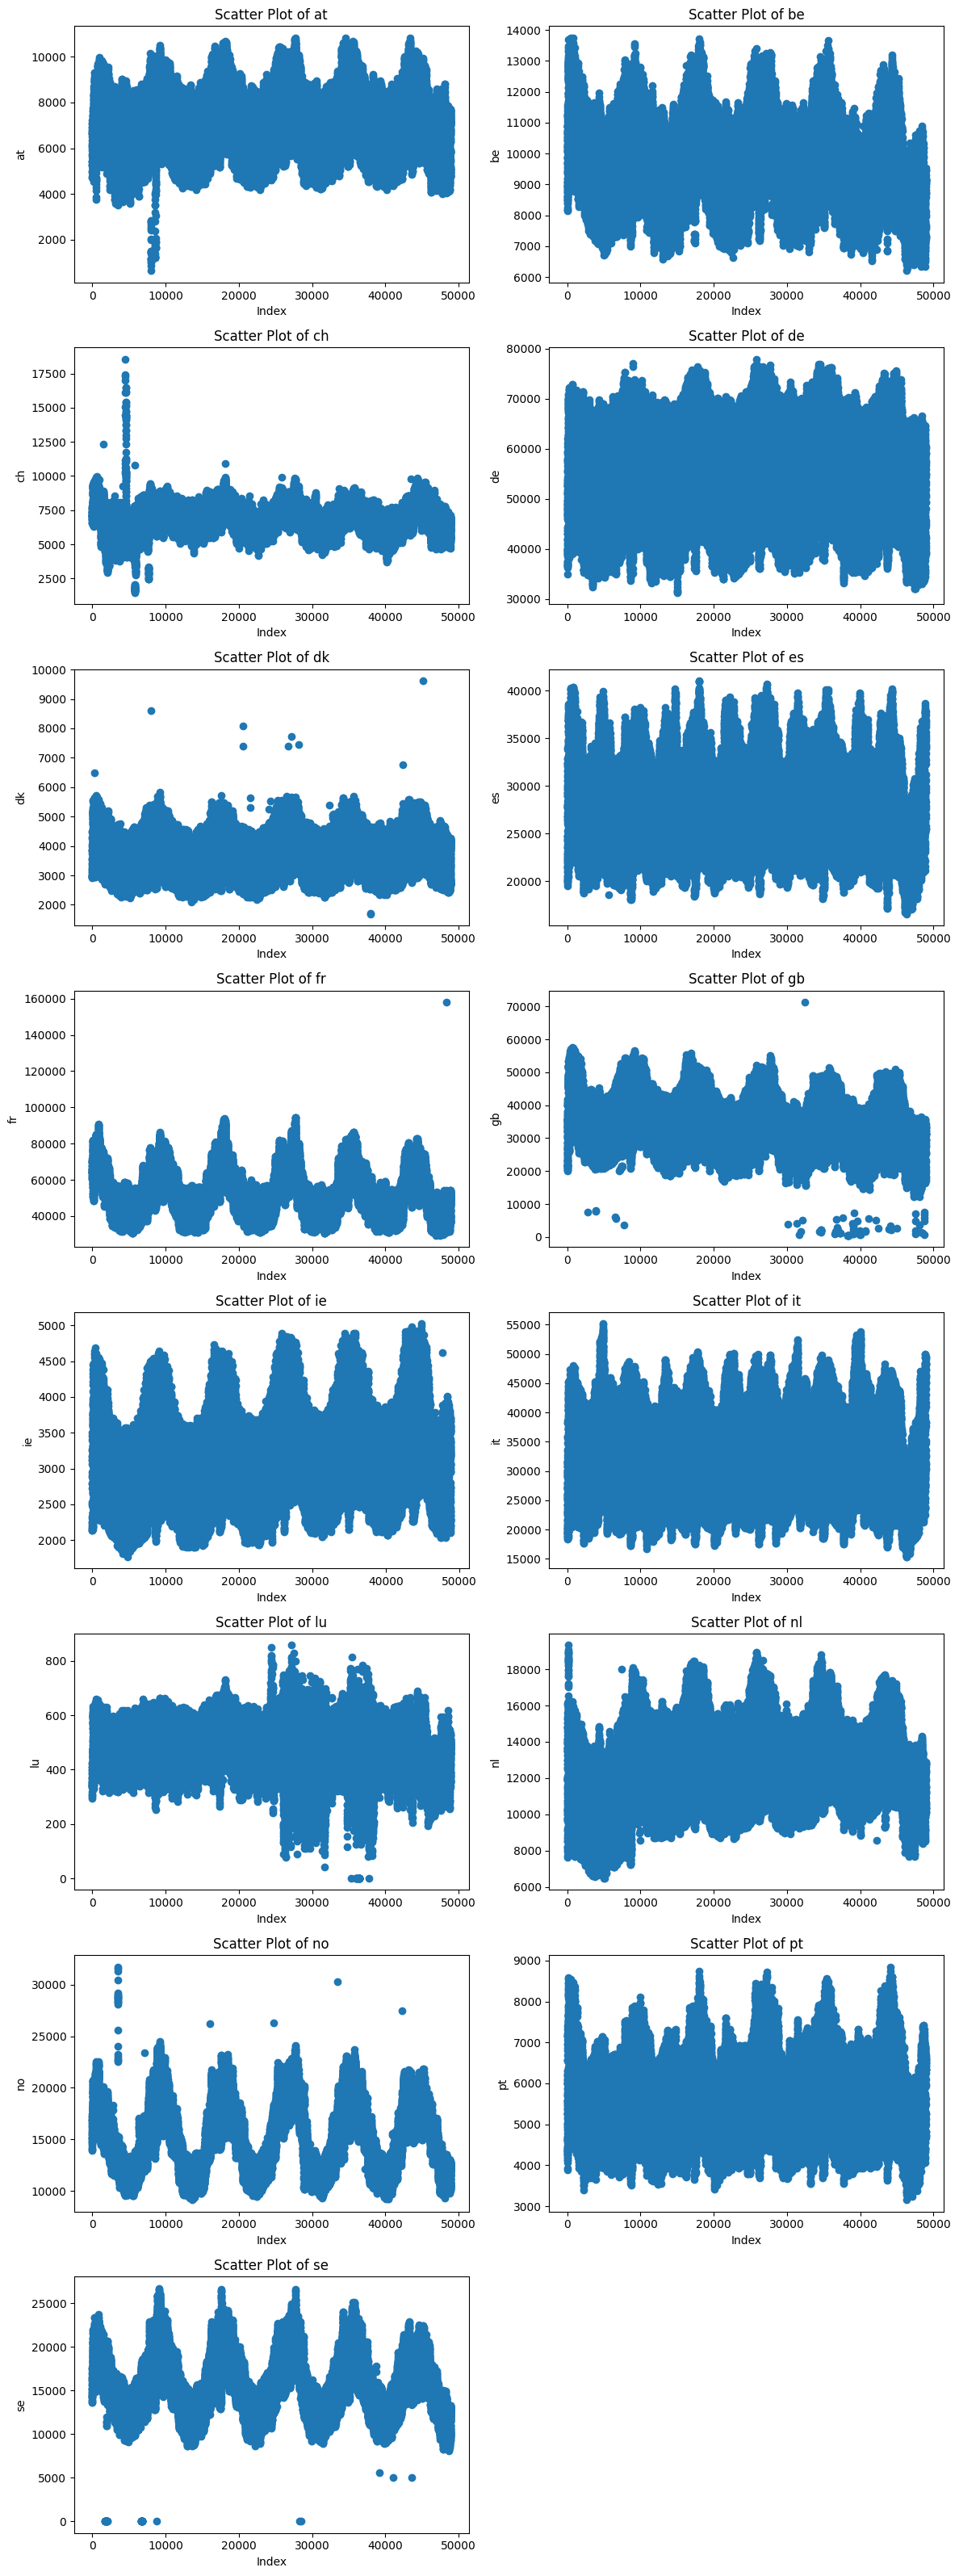

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取Excel文件
df = pd.read_excel('F:/AAA/GNN_Gaussian/data/ENTSO/ENTSO.xlsx')
df=df.iloc[:,-15:]

# 确定图形的行数和列数
num_rows = (len(df.columns) + 1) // 2
num_cols = 2

# 创建一个图形窗口
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))

# 按列绘制散点图
for i, col in enumerate(df.columns):
    row = i // num_cols
    col_idx = i % num_cols
    if row < num_rows:
        ax = axes[row, col_idx]
        ax.scatter(df.index, df[col])
        ax.set_title(f'Scatter Plot of {col}')
        ax.set_xlabel('Index')
        ax.set_ylabel(col)

# 隐藏多余的子图
for i in range(len(df.columns), num_rows * num_cols):
    row = i // num_cols
    col_idx = i % num_cols
    axes[row, col_idx].set_visible(False)

# 调整子图间距
plt.tight_layout()
plt.show()

In [63]:
import numpy as np
import pandas as pd

# 读取Excel文件
df = pd.read_excel('F:/AAA/GNN_Gaussian/data/ENTSO/ENTSO.xlsx')

# 只选择后15列
df = df.iloc[:, -15:]

# 定义一个函数，用于填充缺失值和替换异常值
def fill_and_replace_outliers(column):
    # 填充缺失值
    mask_null = column.isnull()  # 获取缺失值的掩码
    for i in mask_null[mask_null].index:
        if i > 0 and i < len(column) - 1:
            prev_val = column.iat[i - 1]
            next_val = column.iat[i + 1]
            if pd.notnull(prev_val) and pd.notnull(next_val):
                column.iat[i] = (prev_val + next_val) / 2
            elif pd.notnull(prev_val):
                column.iat[i] = prev_val
            elif pd.notnull(next_val):
                column.iat[i] = next_val
        elif i == 0 and pd.notnull(column.iat[i + 1]):
            column.iat[i] = column.iat[i + 1]
        elif i == len(column) - 1 and pd.notnull(column.iat[i - 1]):
            column.iat[i] = column.iat[i - 1]

      # 计算四分位数
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    # 定义异常值的范围
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 标记异常值
    mask_outliers = (column < lower_bound) | (column > upper_bound)
    
    # 替换异常值为NaN
    column[mask_outliers] = np.nan
    
    # 填充NaN值
    mask_null = column.isnull()
    for i in mask_null[mask_null].index:
        if i > 0 and i < len(column) - 1:
            prev_val = column.iat[i - 1]
            next_val = column.iat[i + 1]
            if pd.notnull(prev_val) and pd.notnull(next_val):
                column.iat[i] = (prev_val + next_val) / 2
            elif pd.notnull(prev_val):
                column.iat[i] = prev_val
            elif pd.notnull(next_val):
                column.iat[i] = next_val
        elif i == 0 and pd.notnull(column.iat[i + 1]):
            column.iat[i] = column.iat[i + 1]
        elif i == len(column) - 1 and pd.notnull(column.iat[i - 1]):
            column.iat[i] = column.iat[i - 1]
    

    return column

# 应用函数填充每一列的缺失值和替换异常值
df = df.apply(fill_and_replace_outliers, axis=0)

# 保存到新的Excel文件
df.to_excel('F:/AAA/GNN_Gaussian/data/ENTSO/ENTSO_filled.xlsx', index=False)

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# 步骤1: 读取Excel数据集
df = pd.read_excel('F:/AAA/GNN_Gaussian/data/ENTSO/ENTSO_filled.xlsx')

# 步骤2: 检查数据集的基本信息
print("检查缺失值:")
print(df.isnull().sum())


检查缺失值:
at    0
be    0
ch    0
de    0
dk    0
es    0
fr    0
gb    0
ie    0
it    0
lu    0
nl    0
no    0
pt    0
se    0
dtype: int64


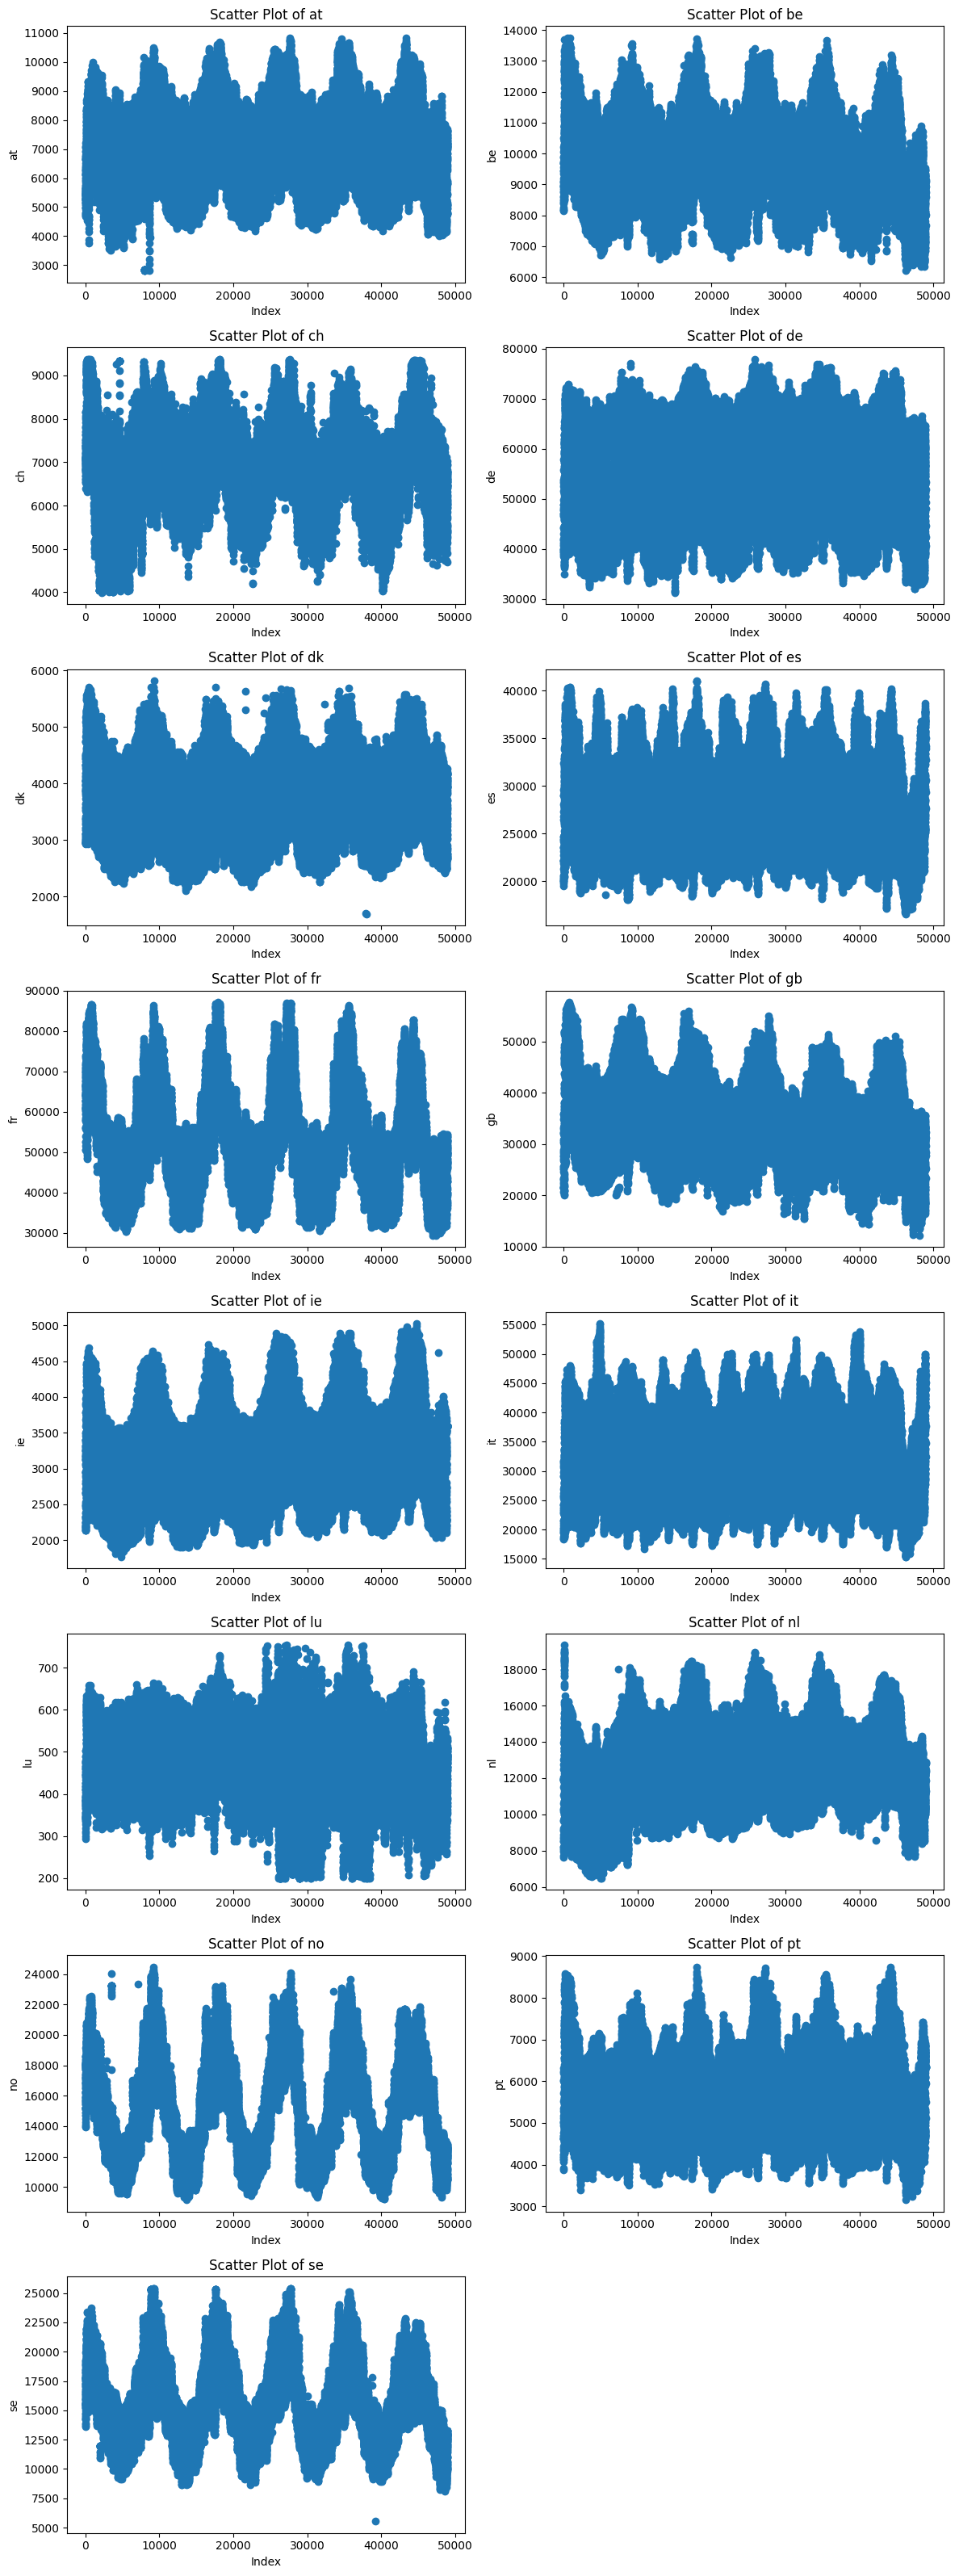

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取Excel文件
df = pd.read_excel('F:/AAA/GNN_Gaussian/data/ENTSO/ENTSO_filled.xlsx')

# 确定图形的行数和列数
num_rows = (len(df.columns) + 1) // 2
num_cols = 2

# 创建一个图形窗口
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))

# 按列绘制散点图
for i, col in enumerate(df.columns):
    row = i // num_cols
    col_idx = i % num_cols
    if row < num_rows:
        ax = axes[row, col_idx]
        ax.scatter(df.index, df[col])
        ax.set_title(f'Scatter Plot of {col}')
        ax.set_xlabel('Index')
        ax.set_ylabel(col)

# 隐藏多余的子图
for i in range(len(df.columns), num_rows * num_cols):
    row = i // num_cols
    col_idx = i % num_cols
    axes[row, col_idx].set_visible(False)

# 调整子图间距
plt.tight_layout()
plt.show()